# Green Jobseekers Dataset Analysis

In [38]:
import pandas as pd
pd.set_option('mode.copy_on_write', True)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
#Read data
df = pd.read_csv('anon-gwx-learner-database.csv')
df.head()

,Created,Last Modified,Gender,Age Range,Age Bracket,Interest in green careers,County,Region (from County),EDUCATION to UPPER_CASE_SNAKE_CASE,Employment Status,Most Recent Job Role (All),Goal At Sign-Up,Industry Interest,GWX Career Interest,How did you hear about us?,DEMOGRAPHIC: Gender,DEMOGRAPHIC: Ethnicity,DEMOGRAPHIC: Age Group
0,21/7/2023 11:32am,30/4/2024 12:45pm,Male,45-54,45-54,yess,Derbyshire - East Midlands,East Midlands,NaN,Not in work or training,NaN,NaN,NaN,NaN,Webflow,NaN,NaN,NaN
1,21/7/2023 11:32am,8/4/2024 4:33pm,Female,NaN,NaN,"Yes, she did some relevant work experience and...",London - Greater London,Greater London,SIXTH_FORM_OR_COLLEGE,Part-Time Employment,NaN,NaN,NaN,NaN,TikTok,NaN,NaN,NaN
2,21/7/2023 11:32am,20/3/2024 1:26pm,Male,NaN,18-24,yes - but mainly interested in tech,NaN,NaN,SIXTH_FORM_OR_COLLEGE,Not in work or training,ex-Army,NaN,NaN,NaN,TikTok,NaN,NaN,NaN
3,21/7/2023 11:32am,5/6/2024 3:33pm,M,25-34,25-34,yes,London - Greater London,Greater London,BTEC_NATIONALS,Part-Time Training,"Security, also Student studying gas boiler eng...",NaN,NaN,NaN,Instagram,NaN,NaN,NaN
4,21/7/2023 11:32am,11/4/2024 6:08pm,Male,25-34,NaN,yes,London - Greater London,Greater London,NaN,NaN,NHS patient transporter,NaN,Retrofit/Building Efficiency,NaN,TikTok,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348 entries, 0 to 4347
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Created                             4348 non-null   object
 1   Last Modified                       4329 non-null   object
 2   Gender                              2213 non-null   object
 3   Age Range                           1777 non-null   object
 4   Age Bracket                         374 non-null    object
 5   Interest in green careers           635 non-null    object
 6   County                              2306 non-null   object
 7   Region (from County)                2306 non-null   object
 8   EDUCATION to UPPER_CASE_SNAKE_CASE  1535 non-null   object
 9   Employment Status                   930 non-null    object
 10  Most Recent Job Role (All)          277 non-null    object
 11  Goal At Sign-Up                     468 non-null    obje

# Data cleaning & processing

* Gender: Merge Gender and DEMOGRAHIC: Gender
* Age: Merge Age Range, Age Bracket and DEMOGRAPHIC: Age Group

In [24]:
# Merge Gender columns
df['Gender'] = df['Gender'].combine_first(df['DEMOGRAPHIC: Gender'])

# Merge Age columns
df['Age'] = df['Age Range'].combine_first(df['Age Bracket'])
df['Age'] = df['Age'].combine_first(df['DEMOGRAPHIC: Age Group'])

# Drop the original DEMOGRAPHIC columns
df.drop(columns=['DEMOGRAPHIC: Gender', 'DEMOGRAPHIC: Age Group', 'Age Range', 'Age Bracket'], inplace=True)
df.head()

,Created,Last Modified,Gender,Interest in green careers,County,Region (from County),EDUCATION to UPPER_CASE_SNAKE_CASE,Employment Status,Most Recent Job Role (All),Goal At Sign-Up,Industry Interest,GWX Career Interest,How did you hear about us?,DEMOGRAPHIC: Ethnicity,Age
0,21/7/2023 11:32am,30/4/2024 12:45pm,Male,yess,Derbyshire - East Midlands,East Midlands,NaN,Not in work or training,NaN,NaN,NaN,NaN,Webflow,NaN,45-54
1,21/7/2023 11:32am,8/4/2024 4:33pm,Female,"Yes, she did some relevant work experience and...",London - Greater London,Greater London,SIXTH_FORM_OR_COLLEGE,Part-Time Employment,NaN,NaN,NaN,NaN,TikTok,NaN,NaN
2,21/7/2023 11:32am,20/3/2024 1:26pm,Male,yes - but mainly interested in tech,NaN,NaN,SIXTH_FORM_OR_COLLEGE,Not in work or training,ex-Army,NaN,NaN,NaN,TikTok,NaN,18-24
3,21/7/2023 11:32am,5/6/2024 3:33pm,M,yes,London - Greater London,Greater London,BTEC_NATIONALS,Part-Time Training,"Security, also Student studying gas boiler eng...",NaN,NaN,NaN,Instagram,NaN,25-34
4,21/7/2023 11:32am,11/4/2024 6:08pm,Male,yes,London - Greater London,Greater London,NaN,NaN,NHS patient transporter,NaN,Retrofit/Building Efficiency,NaN,TikTok,NaN,25-34


In [25]:
df.describe().T

,count,unique,top,freq
Created,4348,2942,21/7/2023 11:32am,1025
Last Modified,4329,416,20/3/2024 1:26pm,1463
Gender,2350,12,MALE,843
Interest in green careers,635,462,Yes,9
County,2306,67,London - Greater London,908
Region (from County),2306,12,Greater London,909
EDUCATION to UPPER_CASE_SNAKE_CASE,1535,13,UNDER_GRADUATE,264
Employment Status,930,16,Not in work or training,261
Most Recent Job Role (All),277,251,Self employed,12
Goal At Sign-Up,468,4,Switch Careers,161


In [26]:
df.Gender.value_counts()

Gender
MALE                 843
Male                 817
Female               292
FEMALE               206
Man                  112
PREFER_NOT_TO_SAY     26
Prefer not to say     24
Woman                 20
NON_BINARY             6
Prefer Not To Say      2
M                      1
Non Binary             1
Name: count, dtype: int64

In [28]:
# Clean and replace Gender
gender_replacements = {
    'Male': 'MALE', 'MALE': 'MALE', 'Man': 'MALE', 'M': 'MALE',
    'Female': 'FEMALE', 'FEMALE': 'FEMALE','Woman': 'FEMALE',
    'Prefer not to say': 'PREFER_NOT_TO_SAY', 'PREFER_NOT_TO_SAY': 'PREFER_NOT_TO_SAY','Prefer Not To Say': 'PREFER_NOT_TO_SAY',
    'Non Binary': 'NON_BINARY', 'NON_BINARY': 'NON_BINARY'
}

# Replace the values in the Gender column using the dictionary
df['Gender'] = df['Gender'].replace(gender_replacements)

# Display unique values in Gender column to verify cleaning
df['Gender'].value_counts()

Gender
MALE                 1773
FEMALE                518
PREFER_NOT_TO_SAY      52
NON_BINARY              7
Name: count, dtype: int64

In [29]:
df.Age.value_counts()

Age
25-34             582
35-44             472
18-24             359
45-54             318
55-64             183
DELETE             71
25-29              30
65 and up          20
45-49              17
40-44              16
35-39              15
16-17              14
50-54              11
30-34               9
55-59               8
60-64               6
Under 16 Alert      1
Name: count, dtype: int64

In [35]:
age_replacements = {
    '18-24':'18-24',
    '25-29':'25-34','30-34':'25-34',
    '35-39':'35-44','40-44':'35-44',
    '45-49':'45-54','50-54':'45-54',
    '55-59':'55-64','60-64':'55-64',
    '60 and up': '65+'
}



# Replace the values in the Age column using the dictionary
df['Age'] = df['Age'].replace(age_replacements)

# Drop rows under 18 and replace DELETE with NaN
df = df[~df['Age'].isin(['16-17', 'Under 16 Alert'])]
df['Age'] = df['Age'].replace('DELETE', np.nan)
df['Age'].value_counts()

Age
25-34        621
35-44        503
18-24        359
45-54        346
55-64        197
65 and up     20
Name: count, dtype: int64

In [31]:
df.describe().T

,count,unique,top,freq
Created,4333,2936,21/7/2023 11:32am,1016
Last Modified,4314,414,20/3/2024 1:26pm,1452
Gender,2341,4,MALE,1765
Interest in green careers,628,456,Yes,9
County,2303,67,London - Greater London,906
Region (from County),2303,12,Greater London,907
EDUCATION to UPPER_CASE_SNAKE_CASE,1528,13,UNDER_GRADUATE,264
Employment Status,923,16,Not in work or training,260
Most Recent Job Role (All),273,247,Self employed,12
Goal At Sign-Up,468,4,Switch Careers,161


In [32]:
df['Employment Status'].value_counts()

Employment Status
Not in work or training                       260
Full-Time Employment                          248
Part-Time Employment                          173
Not in education or employment or training    104
Full-Time Student                              61
Part-Time Student                              28
Part-Time Training                             25
Full-Time Training                              7
🤝 Part-Time Employment                          4
Not in education employment or training         3
Self Employment                                 3
🚫 Not in work or training                       2
🤝 Full-Time Employment                          2
💡 Part-Time Training                            1
📚 Full-Time Student                             1
What is your current employment status?         1
Name: count, dtype: int64

In [34]:
# Clean and replace Employment
employment_replacements = {
    '🤝 Part-Time Employment':'Part-Time Employment',
    'Not in education employment or training':'Not in education or employment or training',
    '🚫 Not in work or training':'Not in work or training',
    '🤝 Full-Time Employment':'Full-Time Employment',
    '💡 Part-Time Training':'Part-Time Training',
    '📚 Full-Time Student':'Full-Time Student'
}

# Replace the values in the Employment column using the dictionary
df['Employment Status'] = df['Employment Status'].replace(employment_replacements)
df['Employment Status'] = df['Employment Status'].replace('What is your current employment status?', np.nan)

# Display the unique values in the Employment column to verify the cleaning
df['Employment Status'].value_counts()

Employment Status
Not in work or training                       262
Full-Time Employment                          250
Part-Time Employment                          177
Not in education or employment or training    107
Full-Time Student                              62
Part-Time Student                              28
Part-Time Training                             26
Full-Time Training                              7
Self Employment                                 3
Name: count, dtype: int64

In [61]:
# df['GWX Career Interest'].value_counts()
# df['Industry Interest'].value_counts()

In [13]:
df['EDUCATION to UPPER_CASE_SNAKE_CASE'].value_counts()

EDUCATION to UPPER_CASE_SNAKE_CASE
UNDER_GRADUATE           264
POST_GRADUATE            251
GCSE                     207
A_LEVEL                  195
SIXTH_FORM_OR_COLLEGE    134
OTHER                    131
UNDERGRADUATE            123
POSTGRADUATE              96
APPRENTICESHIP            51
GCSES                     43
OTHER_TRAINING_QUAL       28
BTEC_NATIONALS             4
GCSES_OR_EQUIVALENT        1
Name: count, dtype: int64

In [36]:
# Clean and replace Education
education_replacements = {
    'UNDER_GRADUATE':'UNDERGRADUATE',
    'POST_GRADUATE':'POSTGRADUATE',
    'GCSES_OR_EQUIVALENT':'GCSE',
    'GCSES':'GCSE'
}

# Replace the values in the Education column using the dictionary
df['EDUCATION to UPPER_CASE_SNAKE_CASE'] = df['EDUCATION to UPPER_CASE_SNAKE_CASE'].replace(education_replacements)

# Display the unique values in the Education column to verify the cleaning
df['EDUCATION to UPPER_CASE_SNAKE_CASE'].value_counts()

EDUCATION to UPPER_CASE_SNAKE_CASE
UNDERGRADUATE            387
POSTGRADUATE             347
GCSE                     251
A_LEVEL                  195
SIXTH_FORM_OR_COLLEGE    134
OTHER                    131
APPRENTICESHIP            51
OTHER_TRAINING_QUAL       28
BTEC_NATIONALS             4
Name: count, dtype: int64

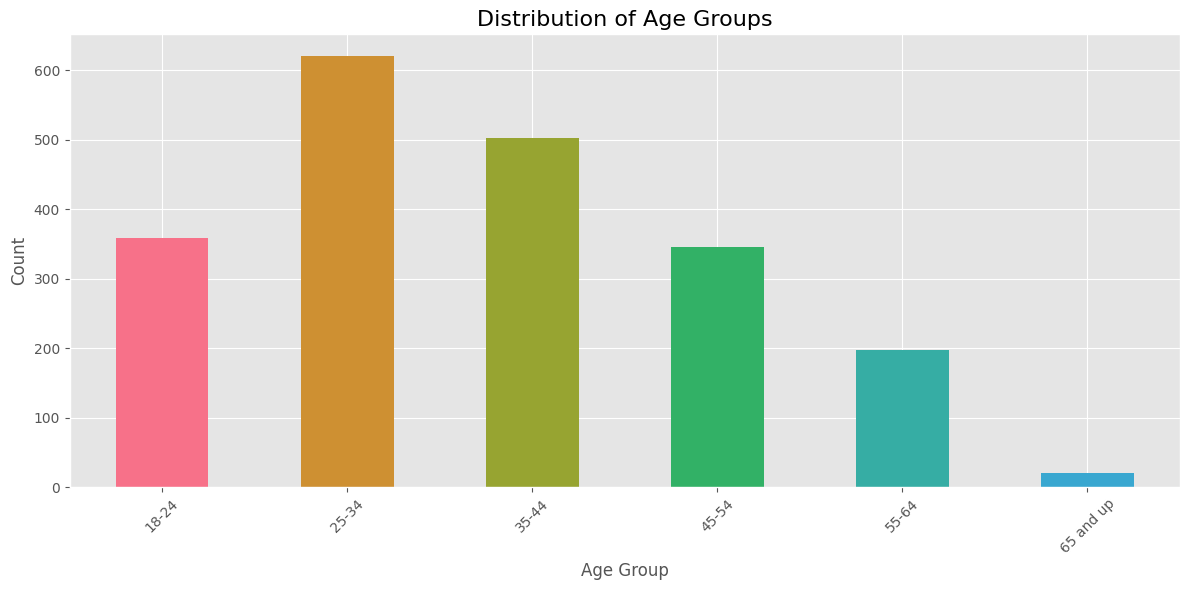

<Figure size 1400x800 with 0 Axes>

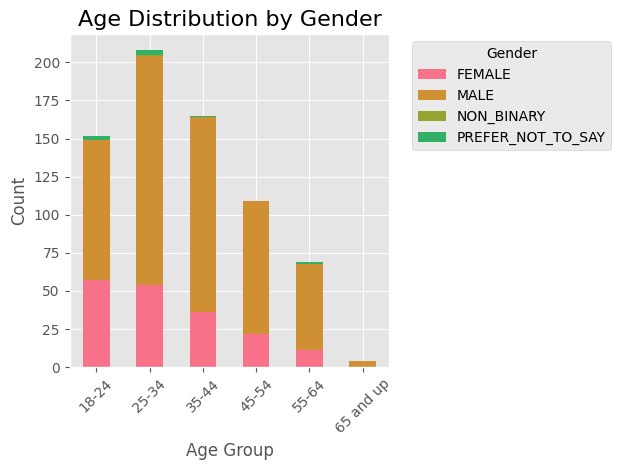

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Set style and palette
plt.style.use('ggplot')
colors = sns.color_palette("husl", 8)

# Bar plot of age groups
plt.figure(figsize=(12, 6))
age_counts = df['Age'].value_counts().sort_index()
age_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Stacked bar plot for age and gender
plt.figure(figsize=(14, 8))
age_gender = df.groupby(['Age', 'Gender']).size().unstack()
age_gender.plot(kind='bar', stacked=True, color=colors)
plt.title('Age Distribution by Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

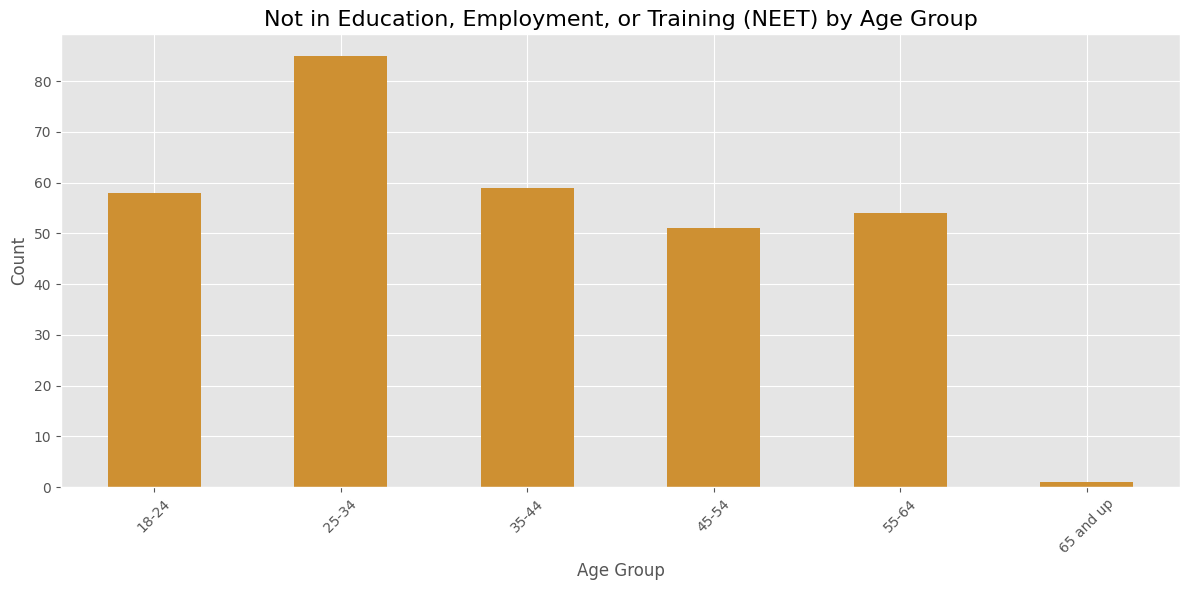

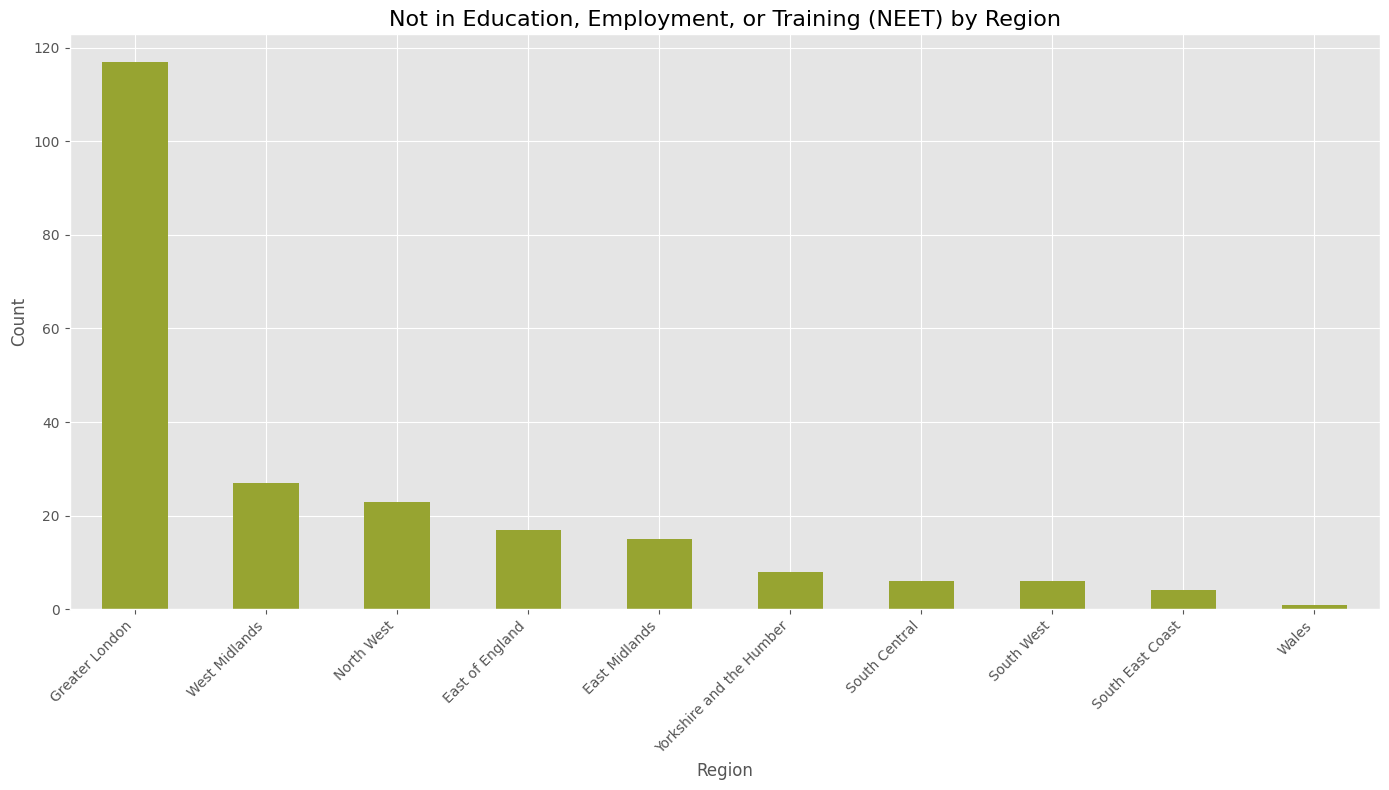

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Filter for people not in education, training, or work
neet_df = df[df['Employment Status'].isin(['Not in work or training', 'Not in education or employment or training'])]

# 6. Bar plot of NEET by age group
plt.figure(figsize=(12, 6))
neet_age_counts = neet_df['Age'].value_counts().sort_index()
neet_age_counts.plot(kind='bar', color=colors[1])
plt.title('Not in Education, Employment, or Training (NEET) by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 7. Bar plot of NEET by region
plt.figure(figsize=(14, 8))
neet_region_counts = neet_df['Region (from County)'].value_counts()
neet_region_counts.plot(kind='bar', color=colors[2])
plt.title('Not in Education, Employment, or Training (NEET) by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

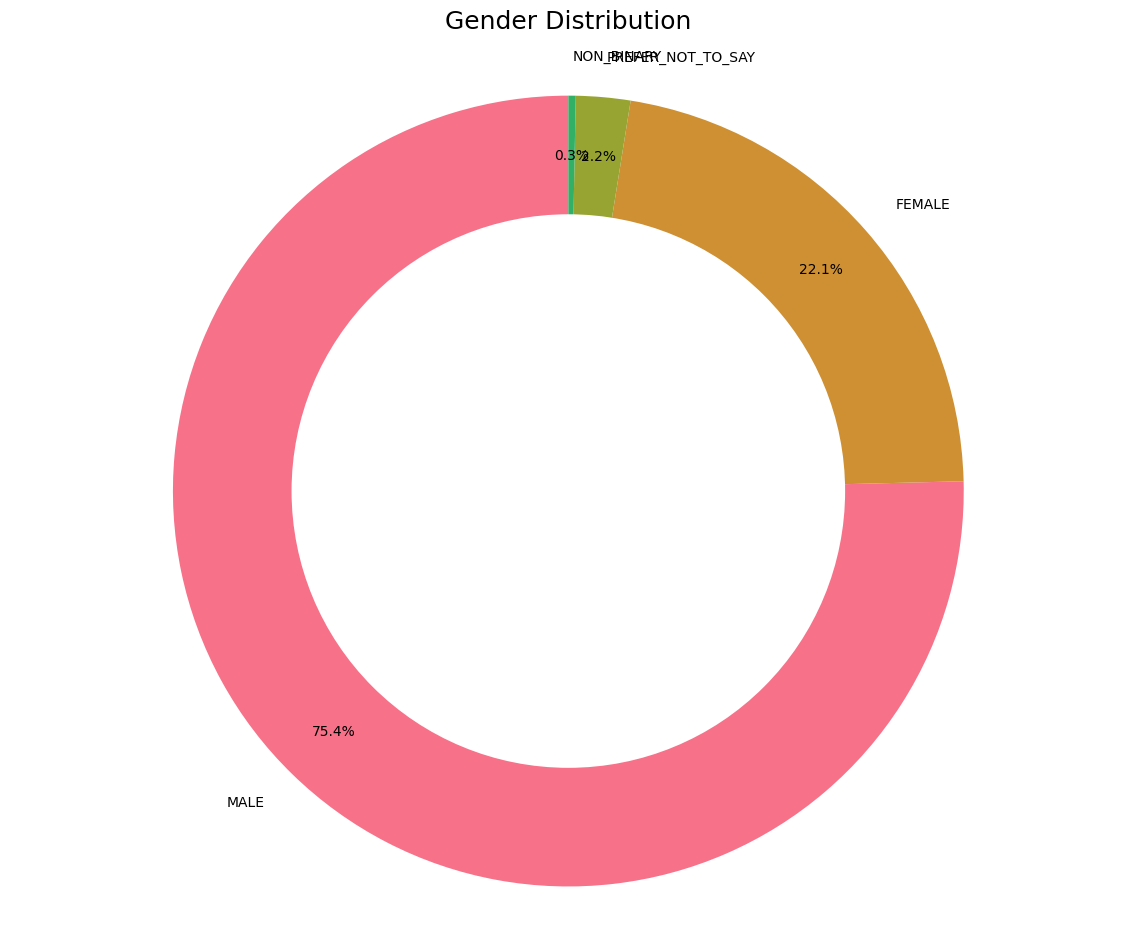

In [45]:
# Pie chart gender
plt.figure(figsize=(12, 10))  
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, pctdistance=0.85)  
plt.title('Gender Distribution', fontsize=18, pad=20) 
plt.axis('equal')
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.tight_layout(pad=3.0)

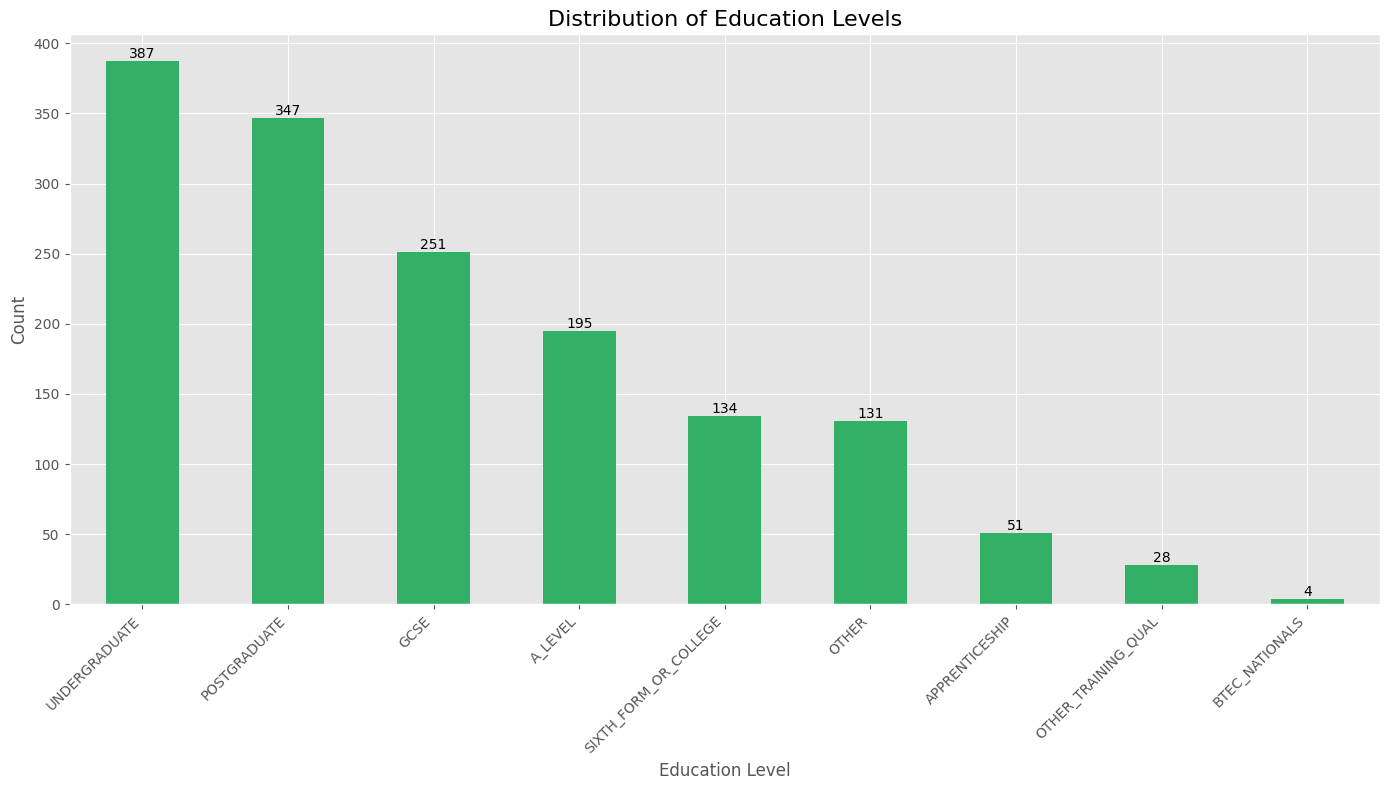

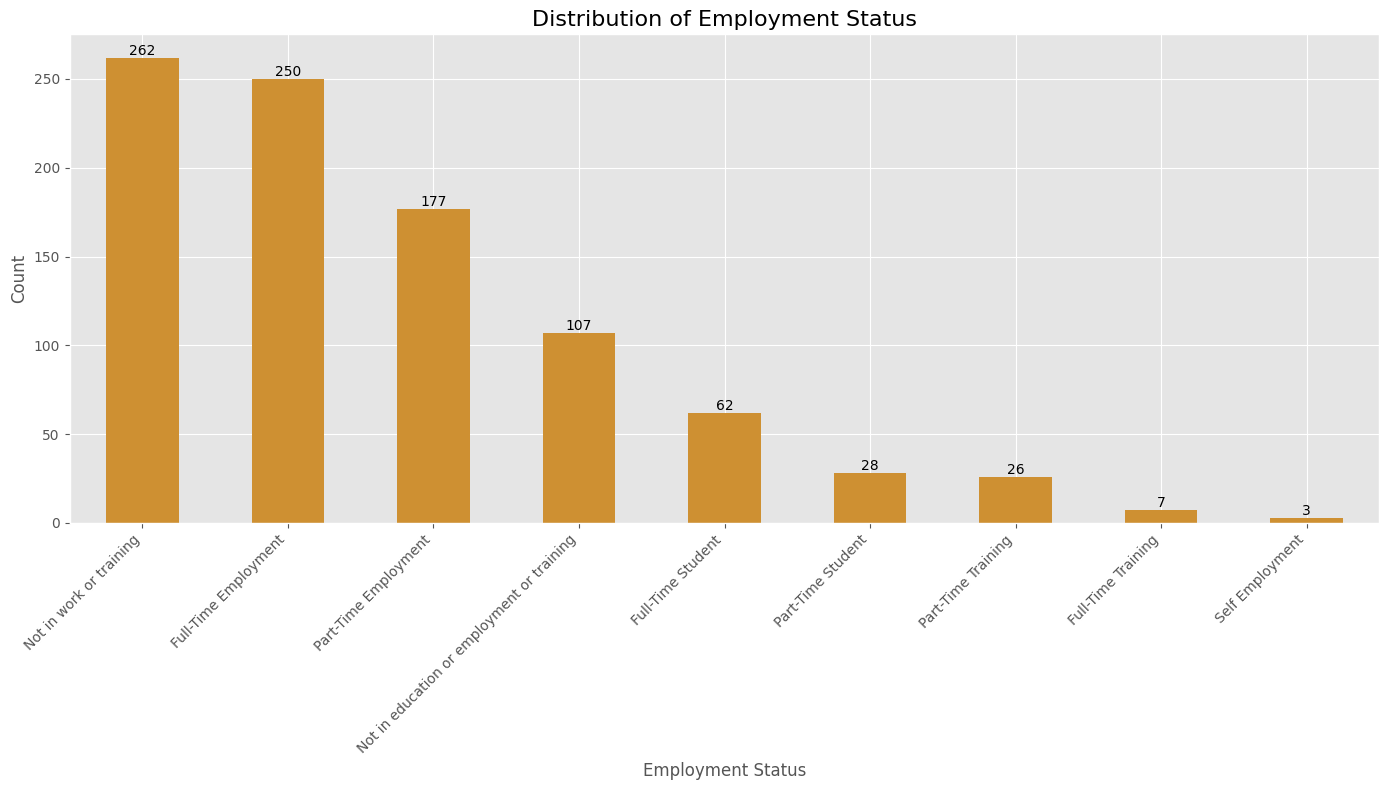

In [46]:

# Education Bar Plot
education_counts = df['EDUCATION to UPPER_CASE_SNAKE_CASE'].value_counts()
plt.figure(figsize=(14, 8))
education_counts.plot(kind='bar', color=colors[3])
plt.title('Distribution of Education Levels', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(education_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Employment Status Plot
employment_counts = df['Employment Status'].value_counts()
plt.figure(figsize=(14, 8))
employment_counts.plot(kind='bar', color=colors[1])
plt.title('Distribution of Employment Status', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(employment_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()